<a href="https://colab.research.google.com/github/KirillShulepov/AIlabs/blob/main/laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №3
ФИО: Шулепов Кирилл Александрович
Группа: БИВТ-22-СП-4

In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('dataset.csv')

# Просмотр первых строк данных
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = data.drop('Target', axis=1)
y = data['Target']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Проверка наличия пропусков
print("Пропуски в тренировочной выборке:")
print(X_train.isnull().sum())
print("\nПропуски в тестовой выборке:")
print(X_test.isnull().sum())

# Заполнение пропусков для численных переменных
from sklearn.impute import SimpleImputer

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_cols) > 0:
    imputer = SimpleImputer(strategy='mean')
    X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])
else:
    print("В данных отсутствуют численные колонки. Пропуск заполнения пропусков для численных переменных.")

# Заполнение пропусков для категориальных переменных
categorical_cols = X_train.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    X_train[categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
    X_test[categorical_cols] = X_test[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
else:
    print("В данных отсутствуют категориальные колонки. Пропуск заполнения пропусков для категориальных переменных.")

Пропуски в тренировочной выборке:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                 

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Кодирование категориальных признаков
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Получение имен колонок для закодированных признаков
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Объединение закодированных категориальных признаков с численными
X_train = pd.concat([pd.DataFrame(X_train_encoded, columns=encoded_feature_names),
                     X_train[numerical_cols]], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_encoded, columns=encoded_feature_names),
                    X_test[numerical_cols]], axis=1)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.impute import SimpleImputer

# Загрузка данных
data = pd.read_csv('dataset.csv')

# Разделение на признаки и целевую переменную
X = data.drop('Target', axis=1)
y = data['Target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка на наличие NaN
if X_train.isnull().any().any() or X_test.isnull().any().any():
    print("В данных все еще присутствуют NaN. Заполняем их.")

    # Заполнение пропусков для всех колонок (числовых и категориальных)
    imputer = SimpleImputer(strategy='most_frequent')  # Используем стратегию 'most_frequent' для всех колонок
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Проверка на наличие NaN после заполнения
if X_train.isnull().any().any() or X_test.isnull().any().any():
    raise ValueError("После заполнения все еще остались NaN в данных. Проверьте данные.")

# Проверка согласованности размеров данных
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Размеры X_train и y_train не совпадают.")

# Обучение модели
model_lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_lr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [8]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Train F1 Score: {train_f1}")
    print(f"Test F1 Score: {test_f1}")

    # ROC-AUC
    try:
        train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
        test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        print(f"Train ROC-AUC: {train_roc_auc}")
        print(f"Test ROC-AUC: {test_roc_auc}")
    except:
        print("ROC-AUC не поддерживается для данной модели")

    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_train, model.predict_proba(X_train)[:, 1], pos_label=model.classes_[1])
    pr_auc = auc(recall, precision)
    print(f"Train PR-AUC: {pr_auc}")

    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=model.classes_[1])
    pr_auc = auc(recall, precision)
    print(f"Test PR-AUC: {pr_auc}")

# Оценка каждой модели
print("Logistic Regression:")
evaluate_model(model_lr, X_train, X_test, y_train, y_test)

print("\nDecision Tree:")
evaluate_model(model_dt, X_train, X_test, y_train, y_test)

print("\nK-Nearest Neighbors:")
evaluate_model(model_knn, X_train, X_test, y_train, y_test)

print("\nRandom Forest:")
evaluate_model(model_rf, X_train, X_test, y_train, y_test)

Logistic Regression:
Train Accuracy: 0.7793161910144109
Test Accuracy: 0.7502824858757062
Train F1 Score: 0.7583350930114493
Test F1 Score: 0.721607159152885
Train ROC-AUC: 0.8841458033077078
Test ROC-AUC: 0.8590789375583762
Train PR-AUC: 0.47548525943998016
Test PR-AUC: 0.3962106779502822

Decision Tree:
Train Accuracy: 0.7745125741734953
Test Accuracy: 0.7435028248587571
Train F1 Score: 0.7547028587433413
Test F1 Score: 0.7236440010161064
Train ROC-AUC: 0.8744794294288623
Test ROC-AUC: 0.8297466287564436
Train PR-AUC: 0.5154658822891033
Test PR-AUC: 0.3878263923057683

K-Nearest Neighbors:
Train Accuracy: 0.7872280305170952
Test Accuracy: 0.6463276836158192
Train F1 Score: 0.7786368867984444
Test F1 Score: 0.6321542661770199
Train ROC-AUC: 0.9171682890610127
Test ROC-AUC: 0.7533025375404753
Train PR-AUC: 0.6286553520025013
Test PR-AUC: 0.26547585447821637

Random Forest:
Train Accuracy: 0.7705566544221532
Test Accuracy: 0.7423728813559322
Train F1 Score: 0.7340297958422038
Test F1 Sc

Logistic Regression with OneVsRestClassifier:
Train Accuracy: 0.7793
Test Accuracy: 0.7503
Train F1 Score: 0.7583
Test F1 Score: 0.7216
Train ROC-AUC: 0.8841
Test ROC-AUC: 0.8591
Train PR-AUC: 0.4755
Test PR-AUC: 0.3962


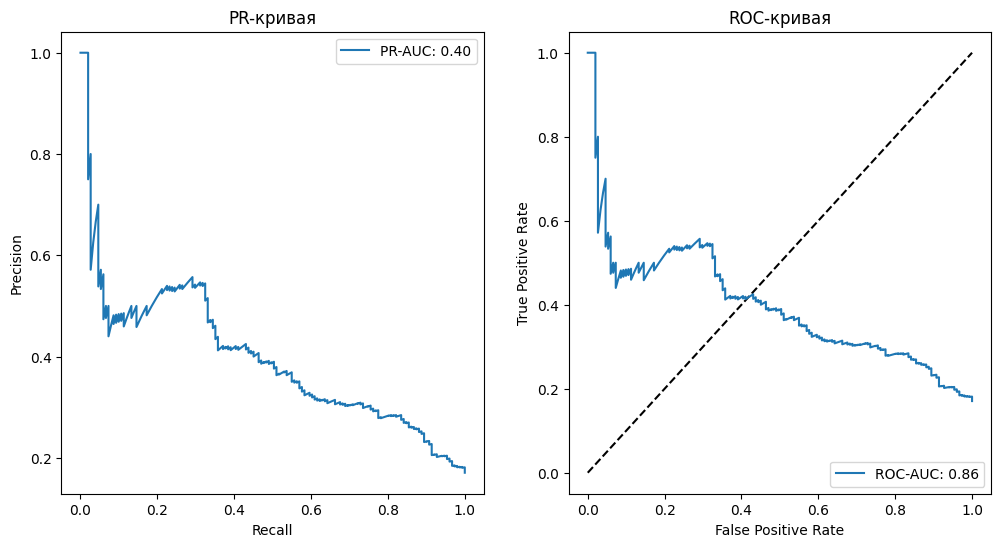


Decision Tree:
Train Accuracy: 0.7745
Test Accuracy: 0.7435
Train F1 Score: 0.7547
Test F1 Score: 0.7236
Train ROC-AUC: 0.8745
Test ROC-AUC: 0.8297
Train PR-AUC: 0.5155
Test PR-AUC: 0.3878


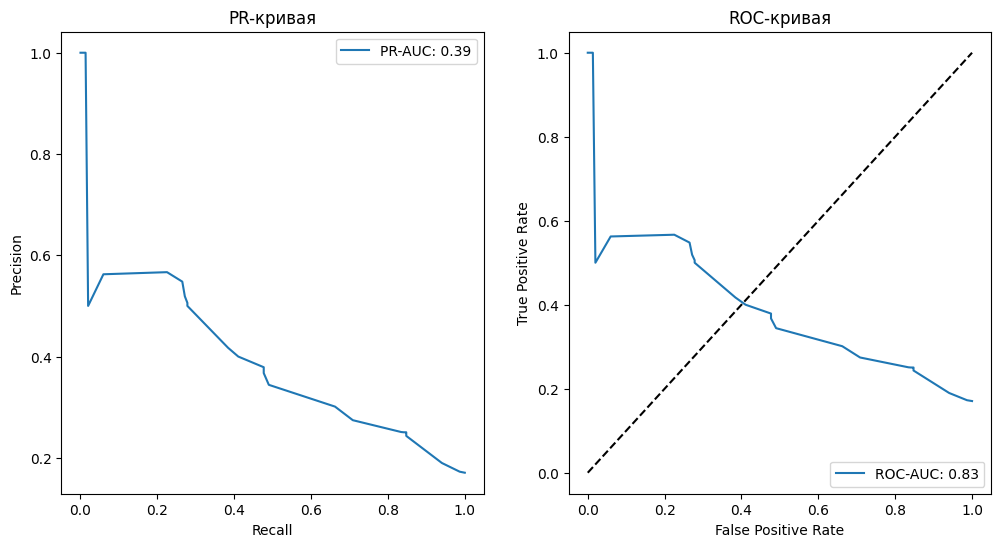


K-Nearest Neighbors:
Train Accuracy: 0.7872
Test Accuracy: 0.6463
Train F1 Score: 0.7786
Test F1 Score: 0.6322
Train ROC-AUC: 0.9172
Test ROC-AUC: 0.7533
Train PR-AUC: 0.6287
Test PR-AUC: 0.2655


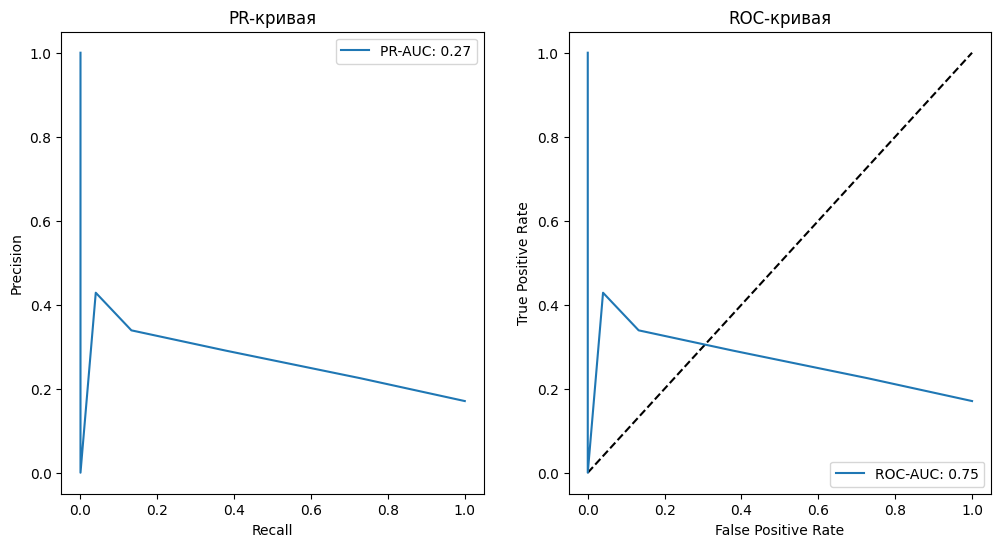


Random Forest:
Train Accuracy: 0.7706
Test Accuracy: 0.7424
Train F1 Score: 0.7340
Test F1 Score: 0.7023
Train ROC-AUC: 0.8997
Test ROC-AUC: 0.8599
Train PR-AUC: 0.5913
Test PR-AUC: 0.4386


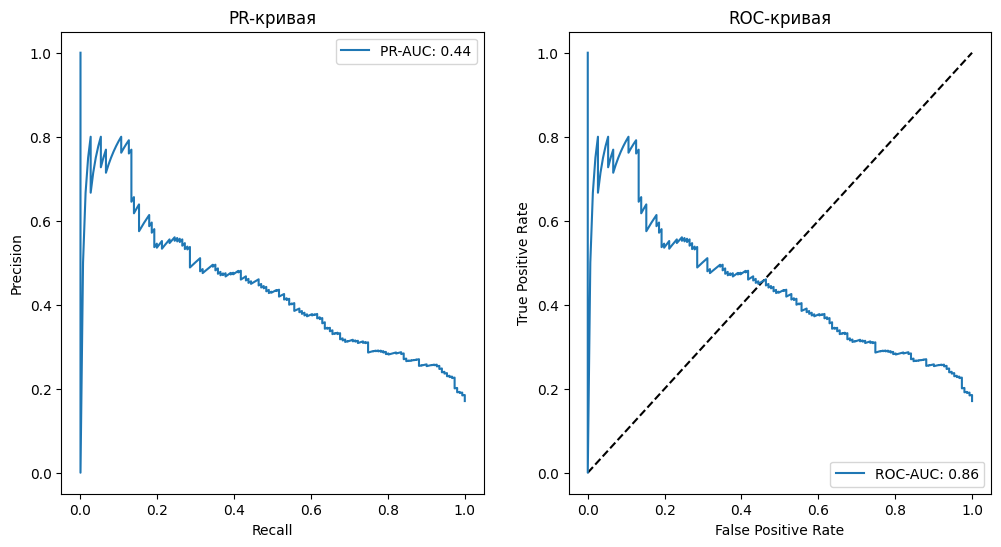

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Функция для вычисления и вывода метрик
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

    # ROC-AUC
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

    print(f"Train ROC-AUC: {train_roc_auc:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_train, y_train_prob[:, 1], pos_label=model.classes_[1])
    train_pr_auc = auc(recall, precision)

    precision, recall, _ = precision_recall_curve(y_test, y_test_prob[:, 1], pos_label=model.classes_[1])
    test_pr_auc = auc(recall, precision)

    print(f"Train PR-AUC: {train_pr_auc:.4f}")
    print(f"Test PR-AUC: {test_pr_auc:.4f}")

    # Графики ROC-AUC и PR-кривой
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'PR-AUC: {test_pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR-кривая')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(recall, precision, label=f'ROC-AUC: {test_roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()

    plt.show()

# Оценка моделей
print("Logistic Regression with OneVsRestClassifier:")
evaluate_model(model_lr, X_train, X_test, y_train, y_test)

print("\nDecision Tree:")
evaluate_model(model_dt, X_train, X_test, y_train, y_test)

print("\nK-Nearest Neighbors:")
evaluate_model(model_knn, X_train, X_test, y_train, y_test)

print("\nRandom Forest:")
evaluate_model(model_rf, X_train, X_test, y_train, y_test)